# Importing All the required libraries

In [34]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
pip install nltk

#Visualise the data

In [36]:
#Loading data set
df=pd.read_csv(r'laptop_price.csv', encoding="ISO-8859-1")
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [37]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [38]:
# Display the data types and dataset information
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [39]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


# Data cleaning

In [40]:
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [41]:
# Check and print the number of duplicate rows
duplicate_count_before = df.duplicated().sum()
print("Total number of duplicate rows:", duplicate_count_before)

Total number of duplicate rows: 0


In [42]:
# Check the number of unique values
df.nunique()

,0
laptop_ID,1303
Company,19
Product,618
TypeName,6
Inches,18
ScreenResolution,40
Cpu,118
Ram,9
Memory,39
Gpu,110


In [43]:
# Check if 'laptop_ID' is still in the dataset
print("laptop_ID" in df.columns)
print("Remaining columns:", df.columns)

True
Remaining columns: Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


# Data Transforming

## Convert Ram to Integer data

In [44]:
#  5 rows before transformation
print("Before Removing 'GB' from Ram:")
print(df[["Ram"]].head())

df["Ram"] = df["Ram"].astype(str).str.replace("GB", "").astype(int)

#  first 5 rows after transformation
print("\nAfter Removing 'GB' from Ram:")
print(df[["Ram"]].head())

Before Removing 'GB' from Ram:
    Ram
0   8GB
1   8GB
2   8GB
3  16GB
4   8GB

After Removing 'GB' from Ram:
   Ram
0    8
1    8
2    8
3   16
4    8


In [45]:
# Display unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Number of Unique Values: {len(unique_values)}")
    print(f"Unique Values: {unique_values[:10]}... \n")  # Displaying first 10 unique values

Column: laptop_ID
Number of Unique Values: 1303
Unique Values: [ 1  2  3  4  5  6  7  8  9 10]... 

Column: Company
Number of Unique Values: 19
Unique Values: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba']... 

Column: Product
Number of Unique Values: 618
Unique Values: ['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13']... 

Column: TypeName
Number of Unique Values: 6
Unique Values: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']... 

Column: Inches
Number of Unique Values: 18
Unique Values: [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5]... 

Column: ScreenResolution
Number of Unique Values: 40
Unique Values: ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920

bold text## Perform data transform using Feature Engineering and grouping similar spec into bigger themes

In [46]:
# First we do for Screen Resolution
# Extract the display type (text before resolution)
df["Display_Type"] = df["ScreenResolution"].apply(lambda x: re.split(r"\d+x\d+", x)[0].strip())
# Extract screen width and height
df["Resolution"] = df["ScreenResolution"].str.extract(r'(\d+x\d+)')
df["Screen_Width"] = df["Resolution"].str.split("x").str[0].astype(float)
df["Screen_Height"] = df["Resolution"].str.split("x").str[1].astype(float)
# Replace empty or missing values with "Unknown"
df["Display_Type"] = df["Display_Type"].replace("", "Others")
# Drop the temporary column
df.drop(columns=["Resolution"], inplace=True)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Display_Type,Screen_Width,Screen_Height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560.0,1600.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Others,1440.0,900.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920.0,1080.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880.0,1800.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560.0,1600.0


## Extract cpu brand and speed

In [47]:
# Ensure that all cpu column are having specific GHz value
df["cpu_ends_with_GHz"] = df["Cpu"].astype(str).str.endswith("GHz")
df["cpu_ends_with_GHz"].value_counts()
# Drop the temporary column that used to count number of cup ends with GHz
df.drop(columns=["cpu_ends_with_GHz"], inplace=True)

Since we got the count of 1303 for cpu column ends with GHz we can conclude that all laptop spec are having specify GHz value in their cpu column.

In [48]:
# Extract CPU brand (Intel, AMD, etc.)
df["Cpu_Brand"] = df["Cpu"].apply(lambda x: x.split()[0])

# Extract CPU speed (GHz)
df["Cpu_Speed"] = df["Cpu"].str.extract(r'(\d+\.?\d*)GHz').astype(float)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Display_Type,Screen_Width,Screen_Height,Cpu_Brand,Cpu_Speed
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560.0,1600.0,Intel,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Others,1440.0,900.0,Intel,1.8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920.0,1080.0,Intel,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880.0,1800.0,Intel,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560.0,1600.0,Intel,3.1


## Get the total Memory

In [49]:
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [50]:
def convert_memory(mem):
    mem = mem.upper()  # Ensure uniform case

    # Extract TB values, convert them to GB
    tb_values = re.findall(r'(\d+)TB', mem)
    total_gb = sum(int(tb) * 1024 for tb in tb_values)  # Convert TB to GB

    # Extract GB values and sum them
    gb_values = re.findall(r'(\d+)GB', mem)
    total_gb += sum(int(gb) for gb in gb_values)

    return str(total_gb)

In [51]:
# Create new column for Total Memory in GB
df["Total_Memory_GB"] = df["Memory"].apply(convert_memory)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Display_Type,Screen_Width,Screen_Height,Cpu_Brand,Cpu_Speed,Total_Memory_GB
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560.0,1600.0,Intel,2.3,128
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Others,1440.0,900.0,Intel,1.8,128
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920.0,1080.0,Intel,2.5,256
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880.0,1800.0,Intel,2.7,512
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560.0,1600.0,Intel,3.1,256


## Reduce GPU Variations

Check if All GPUs Contain One of the Brands I listed below:
["nvidia", "amd", "intel", "arm"]

In [52]:
# Convert GPU names to lowercase for case-insensitive matching
df["Gpu_Lower"] = df["Gpu"].str.lower()

# Check if each row contains 'NVIDIA', 'AMD', 'Intel', or 'ARM'
df["Gpu_Valid"] = df["Gpu_Lower"].apply(lambda x: any(term in x for term in ["nvidia", "amd", "intel", "arm"]))

# Check if all rows are valid
all_valid = df["Gpu_Valid"].all()
print("All GPUs contain 'NVIDIA', 'AMD', 'Intel', or 'ARM':", all_valid)
# Drop the temporary column
df.drop(columns=["Gpu_Valid", "Gpu_Lower"], inplace=True)

All GPUs contain 'NVIDIA', 'AMD', 'Intel', or 'ARM': True


Extract GPU brand

In [53]:
# Function to extract GPU brand
def extract_gpu_brand(gpu):
    gpu = gpu.lower()
    if "nvidia" in gpu:
        return "NVIDIA"
    elif "amd" in gpu:
        return "AMD"
    elif "intel" in gpu:
        return "Intel"
    elif "arm" in gpu:
        return "ARM"
    else:
        return "Other"
# Apply function to create a new feature column
df["Gpu_Brand"] = df["Gpu"].apply(extract_gpu_brand)

# Display the count per category
print(df["Gpu_Brand"].value_counts())

Gpu_Brand
Intel     722
NVIDIA    400
AMD       180
ARM         1
Name: count, dtype: int64


Feature engineer GPU into different performance level

In [54]:
# Function to classify GPU into tiers
def categorize_gpu(name):
    if "Intel HD" in name or "Intel UHD" in name or "Intel Iris" in name or "Intel Graphics" in name or "ARM Mali" in name or "AMD R4" in name:
        return "Integrated"
    elif "Nvidia GeForce" in name or "Nvidia GTX" in name or "Nvidia RTX" in name:
        return "Gaming GPU"
    elif "Nvidia Quadro" in name:
        return "Workstation GPU"
    elif "AMD Radeon" in name or "AMD R17M-M1-70" in name:
        return "AMD GPU"
    elif "AMD FirePro" in name:
        return "AMD Workstation GPU"
    else:
        return "Other"

# Apply function
df["Gpu_Tier"] = df["Gpu"].apply(categorize_gpu)

# Display the count per category
print(df["Gpu_Tier"].value_counts())

Gpu_Tier
Integrated             724
Gaming GPU             369
AMD GPU                174
Workstation GPU         31
AMD Workstation GPU      5
Name: count, dtype: int64


## OpSys data transforming

Extract General OpSys Name

In [55]:
# Function to extract OpSys Name
def extract_OpSys_Name(OpSys):
    OpSys = OpSys.lower()
    if "windows" in OpSys:
        return "Windows"
    elif "chrome" in OpSys:
        return "Chrome"
    elif "linux" in OpSys:
        return "Linux"
    elif "mac" in OpSys:
        return "Mac"
    elif "android" in OpSys:
        return "Android"
    else:
        return "Other"

# Apply function to create a new feature column
df["OpSys_Name"] = df["OpSys"].apply(extract_OpSys_Name)

# Display the count per category
print(df["OpSys_Name"].value_counts())

OpSys_Name
Windows    1125
Other        66
Linux        62
Chrome       27
Mac          21
Android       2
Name: count, dtype: int64


## Create an Overview Column

In [56]:
df["Overview"] = df["Company"] + " " + df["Product"] + " " + df["Inches"].astype("str") + " " + "Inches" + " " + df["Total_Memory_GB"].astype("str") + "GB" + " " + df["OpSys_Name"] + " " + df["Cpu_Brand"]
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Display_Type,Screen_Width,Screen_Height,Cpu_Brand,Cpu_Speed,Total_Memory_GB,Gpu_Brand,Gpu_Tier,OpSys_Name,Overview
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,...,IPS Panel Retina Display,2560.0,1600.0,Intel,2.3,128,Intel,Integrated,Mac,Apple MacBook Pro 13.3 Inches 128GB Mac Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,Others,1440.0,900.0,Intel,1.8,128,Intel,Integrated,Mac,Apple Macbook Air 13.3 Inches 128GB Mac Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,Full HD,1920.0,1080.0,Intel,2.5,256,Intel,Integrated,Other,HP 250 G6 15.6 Inches 256GB Other Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,...,IPS Panel Retina Display,2880.0,1800.0,Intel,2.7,512,AMD,AMD GPU,Mac,Apple MacBook Pro 15.4 Inches 512GB Mac Intel
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,...,IPS Panel Retina Display,2560.0,1600.0,Intel,3.1,256,Intel,Integrated,Mac,Apple MacBook Pro 13.3 Inches 256GB Mac Intel


# User can get recommendation using text with description of the laptop that they want OR the laptop brand and name

In [57]:
# Load English stop words
stop_words = set(stopwords.words("english"))

In [58]:
# Function to remove stop words
def remove_stopwords(text):
    words = text.lower().split()  # Convert to lowercase and split into words
    filtered_words = [word for word in words if word not in stop_words]  # Remove stop words
    return " ".join(filtered_words)  # Reconstruct sentence

In [59]:
# Function to extract key features from user input
def extract_query_details(user_input, df):
    user_input = user_input.lower()  # Convert to lowercase for consistency

    # Extract screen size (e.g., 13.2 inches)
    screen_size_match = re.search(r'(\d+(\.\d+)?)\s*inch', user_input)
    screen_size = float(screen_size_match.group(1)) if screen_size_match else None
    screen_size = str(screen_size)+" Inches"

    # Extract storage size (e.g., 256GB, 1TB)
    storage_match = re.search(r'(\d+)\s*gb', user_input)
    storage = int(storage_match.group(1)) if storage_match else None
    storage = str(storage)+"GB"

    # Extract RAM (e.g., 8GB, 16GB)
    ram_match = re.search(r'(\d+)\s*gb\s*ram', user_input)
    ram = int(ram_match.group(1)) if ram_match else None

    # Extract possible Company name
    company = None
    for comp in df["Company"].unique():
        if comp.lower() in user_input:
            company = comp
            break

    # Extract possible Product name
    product_name = None
    for product in df["Product"].unique():
        if product.lower() in user_input:
            product_name = product
            break

    # Extract TypeName (Ultrabook, Gaming, Notebook, etc.)
    typename = None
    for type_name in df["TypeName"].unique():
        if type_name.lower() in user_input:
            typename = type_name
            break

    # Extract Operating System
    os = None
    for os_name in df["OpSys_Name"].unique():
        if os_name.lower() in user_input:
            os = os_name
            break

    # Extract CPU details (Intel, AMD, Apple M1, etc.)
    cpu = None
    for cpu_name in df["Cpu_Brand"].unique():
        if cpu_name.lower() in user_input:
            cpu = cpu_name
            break

    return {
        "company": company,
        "product_name": product_name,
        "typename": typename,
        "screen_size": screen_size,
        "storage": storage,
        "ram": ram,
        "os": os,
        "cpu": cpu
    }


In [60]:
def dict_to_compact_string(details):
    """
    Converts a dictionary of extracted laptop features into a simple lowercase string.
    Ignores keys with None values and removes extra spaces.
    """
    # Extract only the values, ignoring None
    values = [str(value) for value in details.values() if value is not None]

    # Join values into a single string
    return " ".join(values)

## We can now promt user to input the specification of the laptop that they wish to buy OR the laptop brand

In [61]:
# User input
user_input = "I want a laptop HP brand with notebook 15.2inches with 256gb"
extracted_details = extract_query_details(user_input, df)

# Convert to compact string
compact_string = dict_to_compact_string(extracted_details)
print(compact_string)

HP Notebook 15.2 Inches 256GB


## Creating an extra table to perform similarity between user input overview of the laptop and laptop overview in the dataset

In [62]:
# Extract the "Overview" column
overview_column = df[["Overview"]].copy()

# Add new overview info from the user input to the column
new_Overview = pd.DataFrame([{"Overview": compact_string}])

# Append the new value while keeping all original rows
overview_column = pd.concat([overview_column, new_Overview], ignore_index=True)

# Display the last few rows to confirm the addition
overview_column.tail()

,Overview
1299,Lenovo Yoga 900-13ISK 13.3 Inches 512GB Window...
1300,Lenovo IdeaPad 100S-14IBR 14.0 Inches 64GB Win...
1301,HP 15-AC110nv (i7-6500U/6GB/1TB/Radeon 15.6 In...
1302,Asus X553SA-XX031T (N3050/4GB/500GB/W10) 15.6 ...
1303,HP Notebook 15.2 Inches 256GB


## Perform similarty computation for searching the laptop index in our dataset that matched with their requirement.

In [63]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(overview_column['Overview'])

In [64]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [65]:
# Get the pairwsie similarity scores of all movies with that movie
sim_scores = list(enumerate(cosine_sim[1303]))

# Sort the movies based on the similarity scores
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# Get the scores of the most similar movies
sim_scores = sim_scores[1]

# Get the movie indices
Laptop_Index = sim_scores[0]
print(Laptop_Index)

771


## Now we got the laptop index that is close to the user description. Lets verify it

In [66]:
print("User Requested:")
print(user_input)
print("Laptop that match:")
print(df.iloc[Laptop_Index]["Overview"])

User Requested:
I want a laptop HP brand with notebook 15.2inches with 256gb
Laptop that match:
Samsung Notebook 9 15.0 Inches 256GB Windows Intel


# String-Based Similarity (Cosine Similarity)

In [67]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
  if isinstance(x, str):
      return str.lower(x.replace(" ", ""))
  else:
      return ''

# Apply clean_data function to your features.
features = ['TypeName', 'OpSys_Name', 'Display_Type', 'Cpu_Brand', 'Gpu_Brand', 'Gpu_Tier']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

# Combine string-based metadata into a single text column
df["metadata_text"] = df["TypeName"] + " " + df["OpSys_Name"] + " " + df["Display_Type"] + " " + df["Cpu_Brand"] + " " + df["Gpu_Brand"] + " " + df["Gpu_Tier"]
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Screen_Width,Screen_Height,Cpu_Brand,Cpu_Speed,Total_Memory_GB,Gpu_Brand,Gpu_Tier,OpSys_Name,Overview,metadata_text
0,1,Apple,MacBook Pro,ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,...,2560.0,1600.0,intel,2.3,128,intel,integrated,mac,Apple MacBook Pro 13.3 Inches 128GB Mac Intel,ultrabook mac ipspanelretinadisplay intel inte...
1,2,Apple,Macbook Air,ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,1440.0,900.0,intel,1.8,128,intel,integrated,mac,Apple Macbook Air 13.3 Inches 128GB Mac Intel,ultrabook mac others intel intel integrated
2,3,HP,250 G6,notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,...,1920.0,1080.0,intel,2.5,256,intel,integrated,other,HP 250 G6 15.6 Inches 256GB Other Intel,notebook other fullhd intel intel integrated
3,4,Apple,MacBook Pro,ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,...,2880.0,1800.0,intel,2.7,512,amd,amdgpu,mac,Apple MacBook Pro 15.4 Inches 512GB Mac Intel,ultrabook mac ipspanelretinadisplay intel amd ...
4,5,Apple,MacBook Pro,ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,...,2560.0,1600.0,intel,3.1,256,intel,integrated,mac,Apple MacBook Pro 13.3 Inches 256GB Mac Intel,ultrabook mac ipspanelretinadisplay intel inte...


In [68]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['metadata_text'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [69]:
# Function that takes in index as input and outputs the index of the 10 similar laptops
def get_recommendations(index, cosine_sim=cosine_sim2):

    idx = index


    sim_scores = list(enumerate(cosine_sim[idx]))


    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)


    sim_scores = sim_scores[1:11]


    laptop_indices = [i[0] for i in sim_scores]


    return laptop_indices

In [70]:
cosine_sim2.shape

(1303, 1303)

## An overview of the list of similar laptop based on specify laptop index (String-Based Similarity)




In [71]:
laptop_str_indices = get_recommendations(Laptop_Index,cosine_sim2)
print(laptop_str_indices)
df['Overview'].iloc[laptop_str_indices]

[793, 226, 13, 16, 27, 48, 55, 60, 72, 100]


,Overview
793,Lenovo Yoga 510-15IKB 15.6 Inches 256GB Window...
226,Dell Inspiron 5567 15.6 Inches 1024GB Windows ...
13,Dell Inspiron 3567 15.6 Inches 256GB Windows I...
16,Dell Inspiron 3567 15.6 Inches 256GB Windows I...
27,Dell Inspiron 5570 15.6 Inches 256GB Windows I...
48,Dell Inspiron 3567 15.6 Inches 256GB Windows I...
55,Dell Inspiron 3576 15.6 Inches 256GB Windows I...
60,Dell Inspiron 5770 17.3 Inches 2304GB Windows ...
72,Dell Inspiron 5570 15.6 Inches 256GB Windows I...
100,HP 15-bs017nv (i7-7500U/8GB/256GB/Radeon 15.6 ...


# Numerical Similarity (Euclidean Distance)

Data Preparation

In [72]:
# Select numerical metadata
numerical_columns = ["Inches", "Ram", "Screen_Width", "Screen_Height", "Cpu_Speed", "Total_Memory_GB"]

# Convert all numerical metadata to int
def clean_data(x):
  return float(x)

for metadata in numerical_columns:
    df[metadata] = df[metadata].apply(clean_data)

In [73]:
# Normalize numerical data
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(df[numerical_columns])

# Compute Euclidean Distance and convert to similarity (1 / (1 + distance))
num_similarity = np.array([[euclidean(a, b) for b in numerical_scaled] for a in numerical_scaled])
num_similarity = 1 / (1 + num_similarity)

# Convert to DataFrame for readability
num_similarity_df = pd.DataFrame(num_similarity, index=df["Product"], columns=df["Product"])

In [74]:
print(num_similarity.shape)

(1303, 1303)


## An overview of the list of similar laptop based on specify laptop index (Numerical Similarity)

In [75]:
laptop_num_indices = get_recommendations(Laptop_Index,num_similarity)
print(laptop_num_indices)
df['Overview'].iloc[laptop_num_indices]

[874, 235, 451, 770, 163, 583, 736, 923, 679, 1042]


,Overview
874,Samsung Notebook 9 15.0 Inches 256GB Windows I...
235,Dell Inspiron 5567 15.6 Inches 256GB Linux Intel
451,Dell Precision 3520 15.6 Inches 256GB Windows ...
770,Dell Inspiron 5567 15.6 Inches 256GB Windows I...
163,Lenovo Legion Y520-15IKBN 15.6 Inches 256GB Wi...
583,Dell Latitude 5580 15.6 Inches 256GB Windows I...
736,HP ZBook 15 15.6 Inches 256GB Windows Intel
923,Toshiba Tecra Z50-C-140 15.6 Inches 256GB Wind...
679,Acer Aspire VX5-591G 15.6 Inches 256GB Windows...
1042,Toshiba Tecra A50-C-218 15.6 Inches 256GB Wind...


# Combine the Similarity Matrices from numerical and string using equal significance of each technique(50% for each)

In [76]:
# Define weight factors (adjustable)
alpha = 0.5
beta = 0.5
# Sum and normalize the similarity matrices
combined_similarity = (alpha * cosine_sim2) + (beta * num_similarity)

In [77]:
laptop_indices = get_recommendations(Laptop_Index,combined_similarity)
print(laptop_indices)
df['Overview'].iloc[laptop_indices]

[793, 770, 1186, 1135, 16, 100, 368, 861, 814, 921]


,Overview
793,Lenovo Yoga 510-15IKB 15.6 Inches 256GB Window...
770,Dell Inspiron 5567 15.6 Inches 256GB Windows I...
1186,Dell Inspiron 5578 15.6 Inches 512GB Windows I...
1135,Lenovo IdeaPad 500-15ISK 15.6 Inches 0GB Windo...
16,Dell Inspiron 3567 15.6 Inches 256GB Windows I...
100,HP 15-bs017nv (i7-7500U/8GB/256GB/Radeon 15.6 ...
368,Dell Inspiron 5567 15.6 Inches 256GB Windows I...
861,HP EliteBook 850 15.6 Inches 256GB Windows Intel
814,Dell Vostro 3568 15.6 Inches 256GB Windows Intel
921,HP EliteBook 850 15.6 Inches 256GB Windows Intel


# How do we know if the equal significance of each technique is giving us the good accuracy?

# Accuracy test for accuracy checking

In [78]:
def accuracy_test(target_index, similar_indeices):
  total_string_count = len(similar_indeices)*len(features)
  string_count = 0
  total_num_count = len(similar_indeices)*len(numerical_columns)
  num_count = 0

  for i in (similar_indeices):
    for j in features:
      if df.loc[i,j] == df.loc[target_index,j]:
        string_count += 1

  for i in (similar_indeices):
      for j in numerical_columns:
        if df.loc[i,j] == df.loc[target_index,j]:
          num_count += 1
  string_accuracy = float(string_count)/float(total_string_count)
  num_accuracy = float(num_count)/float(total_num_count)
  overall_accuracy = (float(string_count)+float(num_count))/(float(total_string_count)+float(total_num_count))
  return string_accuracy, num_accuracy, overall_accuracy


## Do the Accuracy test for all posible combination of alpha and beta value

In [79]:
# Step 1: Find the best alpha and beta values through optimization
best_alpha = 0
best_beta = 0
best_accuracy = 0

# Define search range (step size can be adjusted for precision)
alpha_values = np.linspace(0, 1, num=51)

for alpha in alpha_values:
    beta = 1 - alpha

    # Compute combined similarity matrix
    combined_similarity = (alpha * cosine_sim2) + (beta * num_similarity)

    # Compute overall accuracy
    total_accuracy = 0
    for i in range(df.shape[0]):
        laptop_indices = get_recommendations(i, combined_similarity)

        if not laptop_indices:
            continue

        _, _, overall_accuracy = accuracy_test(i, laptop_indices)
        total_accuracy += overall_accuracy

    avg_accuracy = total_accuracy / float(df.shape[0]) if df.shape[0] > 0 else 0

    # Store best accuracy and corresponding alpha, beta
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_alpha = alpha
        best_beta = beta

# Print best alpha, beta, and accuracy
print(f"Best Alpha: {best_alpha}, Best Beta: {best_beta}, Highest Accuracy: {best_accuracy:.4f}")

# Step 2: Use the best alpha and beta values to compute the final similarity matrix
alpha = best_alpha  # Assign optimized alpha
beta = best_beta    # Assign optimized beta

# Compute final combined similarity matrix using the best weights
combined_similarity = (alpha * cosine_sim2) + (beta * num_similarity)

Best Alpha: 0.42, Best Beta: 0.5800000000000001, Highest Accuracy: 0.8453


## Now we got the combination of Alpha and Beta value that gives us the highest accuracy. This prove that the equal significance of each technique(Alpha=0.5, Beta=0.5) is not good enough.

## Lets compare the list of laptop that uses Alpha and Beta Values as below:
## 1. Alpha = 1 and Beta = 0
## 2. Alpha = 0 and Beta = 1
## 3. Alpha = 0.5 and Beta = 0.5
## 4. The best alpha and best beta

## 1. CASE 1 : Alpha = 1, Beta = 0

In [80]:
alpha = 1
beta = 0

# Sum and normalize the similarity matrices
combined_similarity = (alpha * cosine_sim2) + (beta * num_similarity)

In [81]:
laptop_indices = get_recommendations(Laptop_Index,combined_similarity)
print(laptop_indices)
df['Overview'].iloc[laptop_indices]

[793, 226, 13, 16, 27, 48, 55, 60, 72, 100]


,Overview
793,Lenovo Yoga 510-15IKB 15.6 Inches 256GB Window...
226,Dell Inspiron 5567 15.6 Inches 1024GB Windows ...
13,Dell Inspiron 3567 15.6 Inches 256GB Windows I...
16,Dell Inspiron 3567 15.6 Inches 256GB Windows I...
27,Dell Inspiron 5570 15.6 Inches 256GB Windows I...
48,Dell Inspiron 3567 15.6 Inches 256GB Windows I...
55,Dell Inspiron 3576 15.6 Inches 256GB Windows I...
60,Dell Inspiron 5770 17.3 Inches 2304GB Windows ...
72,Dell Inspiron 5570 15.6 Inches 256GB Windows I...
100,HP 15-bs017nv (i7-7500U/8GB/256GB/Radeon 15.6 ...


## 2. CASE 2 : Alpha = 0, Beta = 1

In [82]:
alpha = 0
beta = 1

# Sum and normalize the similarity matrices
combined_similarity = (alpha * cosine_sim2) + (beta * num_similarity)

In [83]:
laptop_indices = get_recommendations(Laptop_Index,combined_similarity)
print(laptop_indices)
df['Overview'].iloc[laptop_indices]

[874, 235, 451, 770, 163, 583, 736, 923, 679, 1042]


,Overview
874,Samsung Notebook 9 15.0 Inches 256GB Windows I...
235,Dell Inspiron 5567 15.6 Inches 256GB Linux Intel
451,Dell Precision 3520 15.6 Inches 256GB Windows ...
770,Dell Inspiron 5567 15.6 Inches 256GB Windows I...
163,Lenovo Legion Y520-15IKBN 15.6 Inches 256GB Wi...
583,Dell Latitude 5580 15.6 Inches 256GB Windows I...
736,HP ZBook 15 15.6 Inches 256GB Windows Intel
923,Toshiba Tecra Z50-C-140 15.6 Inches 256GB Wind...
679,Acer Aspire VX5-591G 15.6 Inches 256GB Windows...
1042,Toshiba Tecra A50-C-218 15.6 Inches 256GB Wind...


## 3. CASE 3 : alpha = 0.5, beta = 0.5

In [84]:
alpha = 0.5
beta = 0.5

# Sum and normalize the similarity matrices
combined_similarity = (alpha * cosine_sim2) + (beta * num_similarity)

In [85]:
laptop_indices = get_recommendations(Laptop_Index,combined_similarity)
print(laptop_indices)
df['Overview'].iloc[laptop_indices]

[793, 770, 1186, 1135, 16, 100, 368, 861, 814, 921]


,Overview
793,Lenovo Yoga 510-15IKB 15.6 Inches 256GB Window...
770,Dell Inspiron 5567 15.6 Inches 256GB Windows I...
1186,Dell Inspiron 5578 15.6 Inches 512GB Windows I...
1135,Lenovo IdeaPad 500-15ISK 15.6 Inches 0GB Windo...
16,Dell Inspiron 3567 15.6 Inches 256GB Windows I...
100,HP 15-bs017nv (i7-7500U/8GB/256GB/Radeon 15.6 ...
368,Dell Inspiron 5567 15.6 Inches 256GB Windows I...
861,HP EliteBook 850 15.6 Inches 256GB Windows Intel
814,Dell Vostro 3568 15.6 Inches 256GB Windows Intel
921,HP EliteBook 850 15.6 Inches 256GB Windows Intel


## 4. CASE 4 : alpha = Best Alpha, beta = Best Beta




In [86]:
alpha = best_alpha
beta = best_beta

# Sum and normalize the similarity matrices
combined_similarity = (alpha * cosine_sim2) + (beta * num_similarity)

In [87]:
laptop_indices = get_recommendations(Laptop_Index,combined_similarity)
print(laptop_indices)
df['Overview'].iloc[laptop_indices]

[793, 770, 1186, 1135, 16, 100, 368, 861, 814, 921]


,Overview
793,Lenovo Yoga 510-15IKB 15.6 Inches 256GB Window...
770,Dell Inspiron 5567 15.6 Inches 256GB Windows I...
1186,Dell Inspiron 5578 15.6 Inches 512GB Windows I...
1135,Lenovo IdeaPad 500-15ISK 15.6 Inches 0GB Windo...
16,Dell Inspiron 3567 15.6 Inches 256GB Windows I...
100,HP 15-bs017nv (i7-7500U/8GB/256GB/Radeon 15.6 ...
368,Dell Inspiron 5567 15.6 Inches 256GB Windows I...
861,HP EliteBook 850 15.6 Inches 256GB Windows Intel
814,Dell Vostro 3568 15.6 Inches 256GB Windows Intel
921,HP EliteBook 850 15.6 Inches 256GB Windows Intel


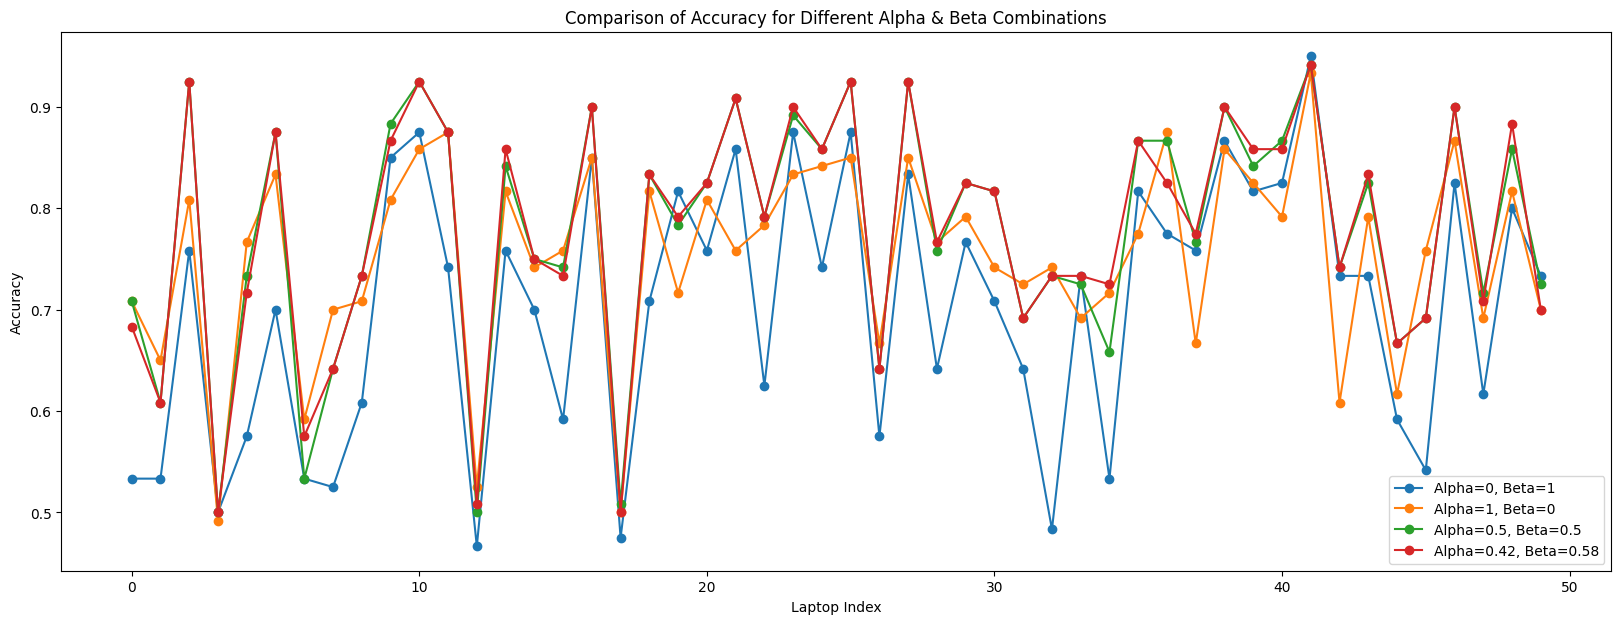

In [88]:
# Store accuracy results
accuracy_results = {
    "Alpha=0, Beta=1": [],
    "Alpha=1, Beta=0": [],
    "Alpha=0.5, Beta=0.5": [],
    f"Alpha={best_alpha:.2f}, Beta={best_beta:.2f}": []
}

# Define the three different similarity matrices
similarity_matrices = {
    "Alpha=0, Beta=1": num_similarity,
    "Alpha=1, Beta=0": cosine_sim2,
    "Alpha=0.5, Beta=0.5": (0.5 * cosine_sim2) + (0.5 * num_similarity),
    f"Alpha={best_alpha:.2f}, Beta={best_beta:.2f}": (best_alpha * cosine_sim2) + (best_beta * num_similarity)
}

# Compute accuracy for each laptop
for key, sim_matrix in similarity_matrices.items():
    for i in range(50):
        laptop_indices = get_recommendations(i, sim_matrix)
        if not laptop_indices:
            accuracy_results[key].append(0)
            continue
        _, _, overall_accuracy = accuracy_test(i, laptop_indices)
        accuracy_results[key].append(overall_accuracy)

# Convert to NumPy arrays for plotting
laptop_ids = np.arange(50)

# Plotting the results
plt.figure(figsize=(20, 7))
for key, accuracies in accuracy_results.items():
    plt.plot(laptop_ids, accuracies, marker='o', label=key)

plt.xlabel("Laptop Index")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy for Different Alpha & Beta Combinations")
plt.legend()
plt.grid(False)
plt.show()

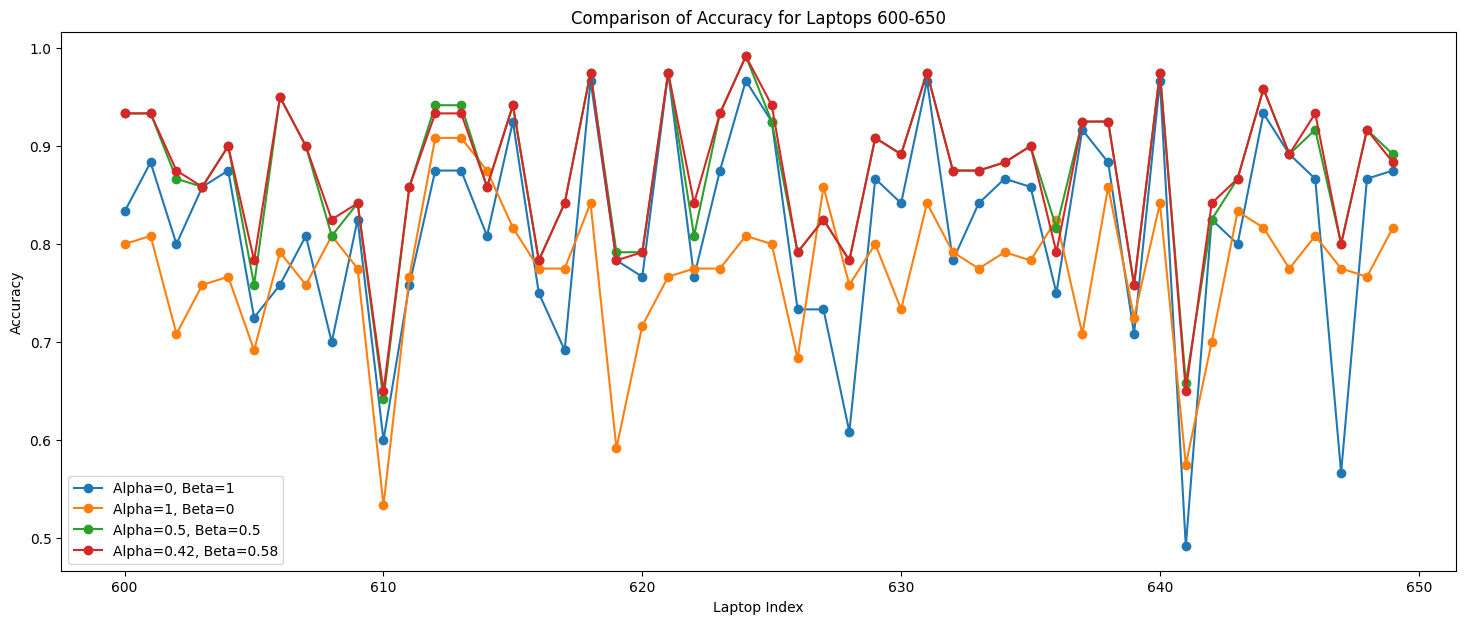

In [89]:
start_idx = 600
end_idx = 650

# Store accuracy results
accuracy_results = {
    "Alpha=0, Beta=1": [],
    "Alpha=1, Beta=0": [],
    "Alpha=0.5, Beta=0.5": [],
    f"Alpha={best_alpha:.2f}, Beta={best_beta:.2f}": []
}

# Define similarity matrices
similarity_matrices = {
    "Alpha=0, Beta=1": num_similarity,
    "Alpha=1, Beta=0": cosine_sim2,
    "Alpha=0.5, Beta=0.5": (0.5 * cosine_sim2) + (0.5 * num_similarity),
    f"Alpha={best_alpha:.2f}, Beta={best_beta:.2f}": (best_alpha * cosine_sim2) + (best_beta * num_similarity)
}

# Compute accuracy for selected range
for key, sim_matrix in similarity_matrices.items():
    for i in range(start_idx, end_idx):
        laptop_indices = get_recommendations(i, sim_matrix)
        if not laptop_indices:
            accuracy_results[key].append(0)
            continue
        _, _, overall_accuracy = accuracy_test(i, laptop_indices)
        accuracy_results[key].append(overall_accuracy)

# Convert to NumPy arrays for plotting
laptop_ids = np.arange(start_idx, end_idx)

# Plotting results
plt.figure(figsize=(18, 7))
for key, accuracies in accuracy_results.items():
    plt.plot(laptop_ids, accuracies, marker='o', label=key)

plt.xlabel("Laptop Index")
plt.ylabel("Accuracy")
plt.title(f"Comparison of Accuracy for Laptops {start_idx}-{end_idx}")
plt.legend()
plt.grid(False)
plt.show()

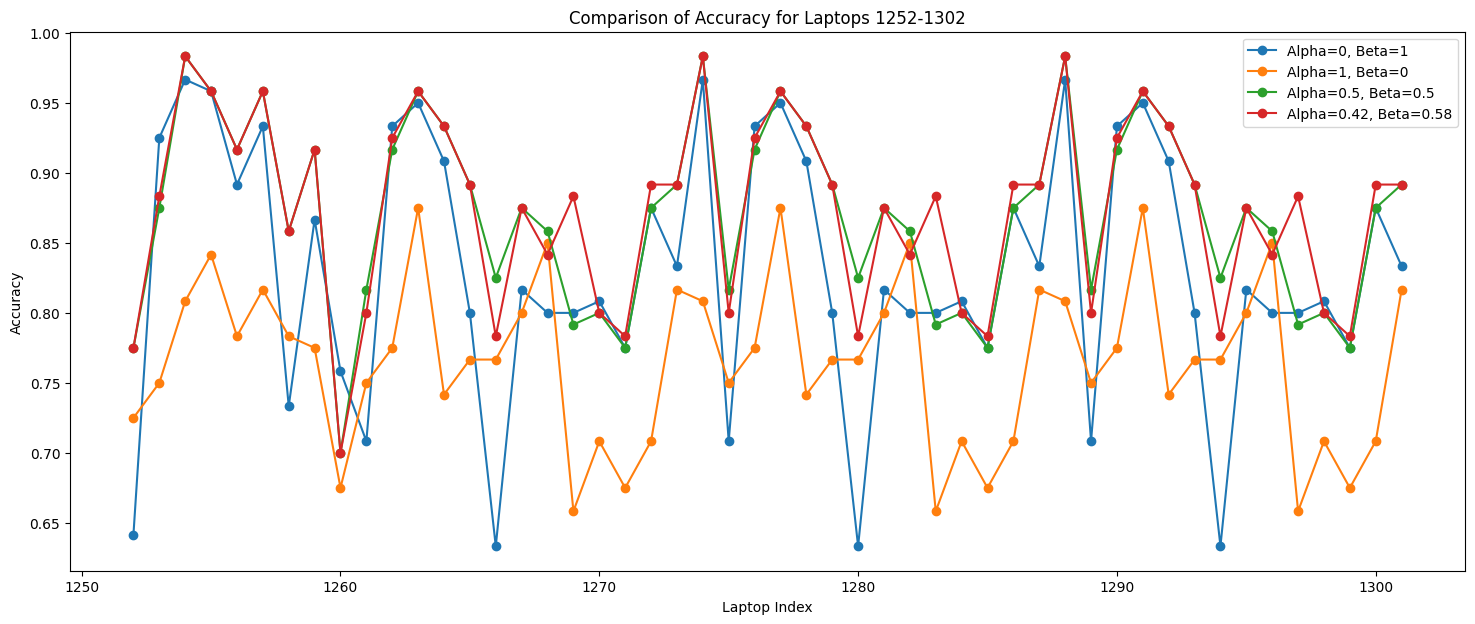

In [90]:
start_idx = 1252
end_idx = 1302

# Store accuracy results
accuracy_results = {
    "Alpha=0, Beta=1": [],
    "Alpha=1, Beta=0": [],
    "Alpha=0.5, Beta=0.5": [],
    f"Alpha={best_alpha:.2f}, Beta={best_beta:.2f}": []
}

# Define similarity matrices
similarity_matrices = {
    "Alpha=0, Beta=1": num_similarity,
    "Alpha=1, Beta=0": cosine_sim2,
    "Alpha=0.5, Beta=0.5": (0.5 * cosine_sim2) + (0.5 * num_similarity),
    f"Alpha={best_alpha:.2f}, Beta={best_beta:.2f}": (best_alpha * cosine_sim2) + (best_beta * num_similarity)
}

# Compute accuracy for selected range
for key, sim_matrix in similarity_matrices.items():
    for i in range(start_idx, end_idx):
        laptop_indices = get_recommendations(i, sim_matrix)
        if not laptop_indices:
            accuracy_results[key].append(0)
            continue
        _, _, overall_accuracy = accuracy_test(i, laptop_indices)
        accuracy_results[key].append(overall_accuracy)

# Convert to NumPy arrays for plotting
laptop_ids = np.arange(start_idx, end_idx)

# Plot the results
plt.figure(figsize=(18, 7))
for key, accuracies in accuracy_results.items():
    plt.plot(laptop_ids, accuracies, marker='o', label=key)

plt.xlabel("Laptop Index")
plt.ylabel("Accuracy")
plt.title(f"Comparison of Accuracy for Laptops {start_idx}-{end_idx}")
plt.legend()
plt.grid(False)
plt.show()

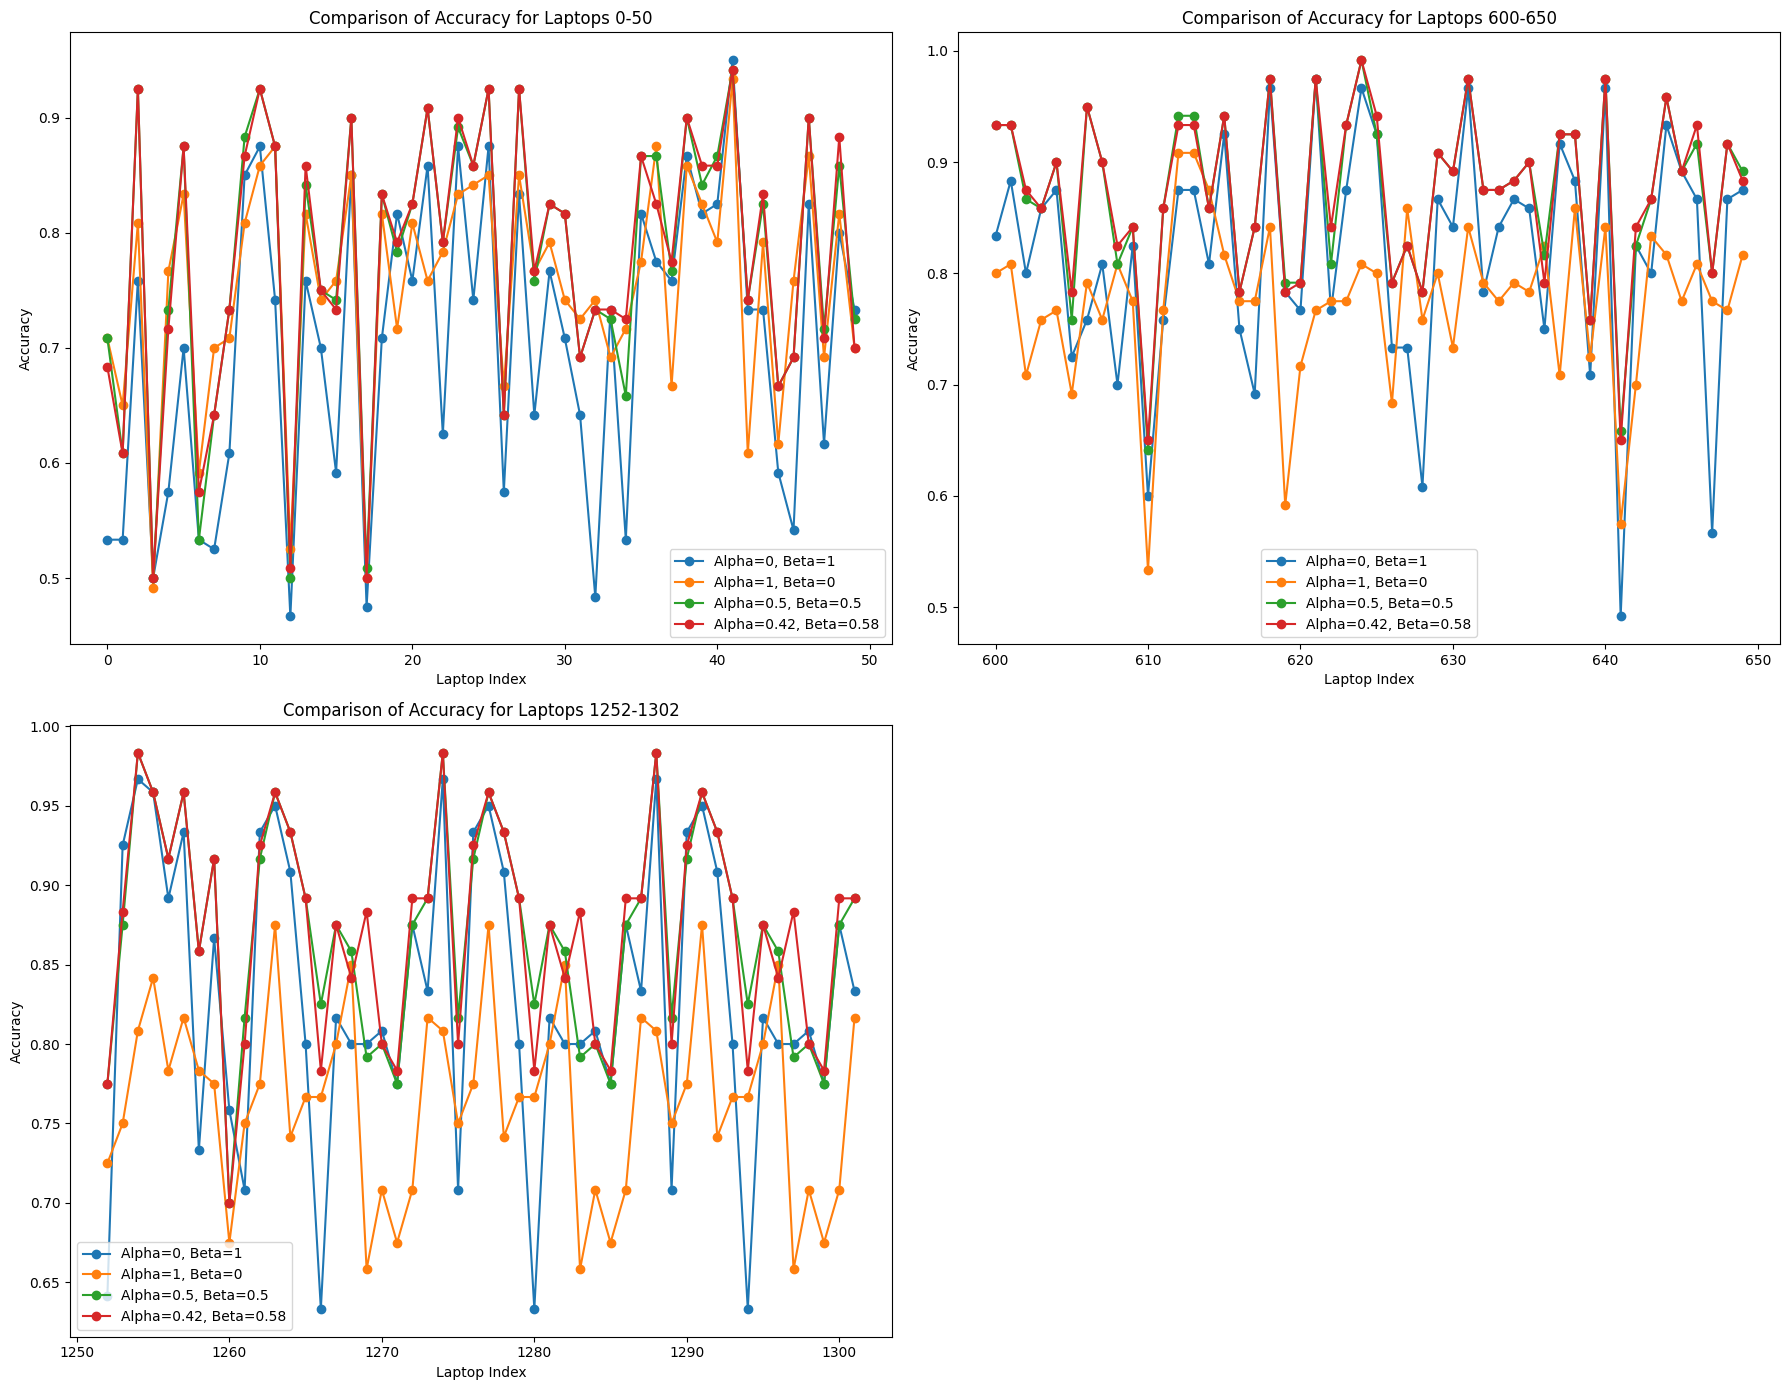

In [91]:
# Define figure and axes
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

sampling_ranges = [(0, 50), (600, 650), (1252, 1302)]
titles = [
    "Comparison of Accuracy for Laptops 0-50",
    "Comparison of Accuracy for Laptops 600-650",
    "Comparison of Accuracy for Laptops 1252-1302"
]

for idx, (start_idx, end_idx) in enumerate(sampling_ranges):
    ax = axes[idx // 2, idx % 2]

    # Store accuracy results
    accuracy_results = {
        "Alpha=0, Beta=1": [],
        "Alpha=1, Beta=0": [],
        "Alpha=0.5, Beta=0.5": [],
        f"Alpha={best_alpha:.2f}, Beta={best_beta:.2f}": []
    }

    # Define similarity matrices
    similarity_matrices = {
        "Alpha=0, Beta=1": num_similarity,
        "Alpha=1, Beta=0": cosine_sim2,
        "Alpha=0.5, Beta=0.5": (0.5 * cosine_sim2) + (0.5 * num_similarity),
        f"Alpha={best_alpha:.2f}, Beta={best_beta:.2f}": (best_alpha * cosine_sim2) + (best_beta * num_similarity)
    }

    # Compute accuracy for selected range
    for key, sim_matrix in similarity_matrices.items():
        for i in range(start_idx, end_idx):
            laptop_indices = get_recommendations(i, sim_matrix)
            if not laptop_indices:
                accuracy_results[key].append(0)  # If no recommendations, set accuracy to 0
                continue
            _, _, overall_accuracy = accuracy_test(i, laptop_indices)
            accuracy_results[key].append(overall_accuracy)

    # Convert to NumPy arrays for plotting
    laptop_ids = np.arange(start_idx, end_idx)


    for key, accuracies in accuracy_results.items():
        ax.plot(laptop_ids, accuracies, marker='o', label=key)

    # Formatting
    ax.set_xlabel("Laptop Index")
    ax.set_ylabel("Accuracy")
    ax.set_title(titles[idx])
    ax.legend()
    ax.grid(False)

# Remove the empty subplot
axes[1, 1].axis("off")

# show the plots
plt.tight_layout()
plt.show()

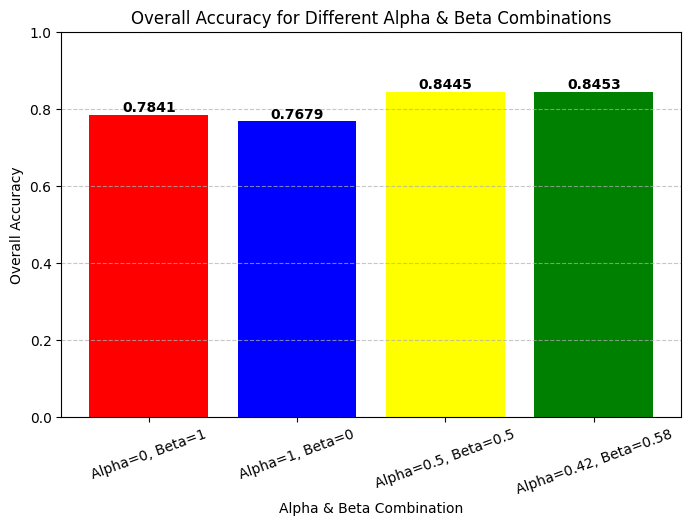

In [92]:
# Store overall accuracy results
overall_accuracy_results = {}

# Define the three different similarity matrices
similarity_matrices = {
    "Alpha=0, Beta=1": num_similarity,
    "Alpha=1, Beta=0": cosine_sim2,
    "Alpha=0.5, Beta=0.5": (0.5 * cosine_sim2) + (0.5 * num_similarity),
    f"Alpha={best_alpha:.2f}, Beta={best_beta:.2f}": (best_alpha * cosine_sim2) + (best_beta * num_similarity)
}

# Compute overall accuracy for each combination
for key, sim_matrix in similarity_matrices.items():
    total_accuracy = 0
    for i in range(df.shape[0]):
        laptop_indices = get_recommendations(i, sim_matrix)
        if not laptop_indices:
            continue
        _, _, overall_accuracy = accuracy_test(i, laptop_indices)
        total_accuracy += overall_accuracy

    # Store average accuracy
    overall_accuracy_results[key] = total_accuracy / float(df.shape[0]) if df.shape[0] > 0 else 0

# Plot the results
plt.figure(figsize=(8, 5))
bars = plt.bar(overall_accuracy_results.keys(), overall_accuracy_results.values(), color=['red', 'blue', 'yellow', 'green'])

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.4f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
plt.xlabel("Alpha & Beta Combination")
plt.ylabel("Overall Accuracy")
plt.title("Overall Accuracy for Different Alpha & Beta Combinations")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# bar chart
plt.show()